In [ ]:
import os.path as path
import raw_data_preprocessing as rdp
import warnings

warnings.filterwarnings('ignore')

googledrive_loc = '/datasets/googledrive'
data_folder_loc = 'Yi_UCI_research/GSR other works/2020 Summer_predict individual training/data/'
file_name = 'raw data/yi feng larger dataset.csv'
data_path = path.join(googledrive_loc, data_folder_loc, file_name)
raw_data = rdp.read_raw_data(data_path)
print('Used Feature columns: {}'.format(rdp.feature_col_names))
data_no_missing = rdp.delete_missing_row(raw_data)


Used Feature columns: ['SES', 'VGQ', 'CFQ', 'Grit_Ambition', 'MRpre', 'DM_diff_pre', 'WM_pre', 'Updating_pre', 'Person_extraver', 'Person_agreeable', 'Person_conscien', 'Person_emot', 'Person_opennes']
The sample size of raw data is 410.
The sample size of no missing data is 379.


The sample size before delete crazy sub: 379
The sample size after delete crazy sub: 358
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
The mean r2 for <class 'regressor.PiecewiselinRegressor'> is: 0.741
          ID  WmeanN_1  WmeanN_2  WmeanN_3  WmeanN_4   WmeanN_5   WmeanN_6  \
75   Irta105  2.595912  3.100649  4.068750  6.002886   8.046310   8.202446   
107  IGTA129  4.569584  8.166917  9.920368  8.895126   9.908163  10.337349   
142  RGTA187  1.448276  3.655556  2.937173  3.119342   2.833333   4.262673   
192   ILB112  2.410714  2.207207  3.155620  4.011905   3.280802   3

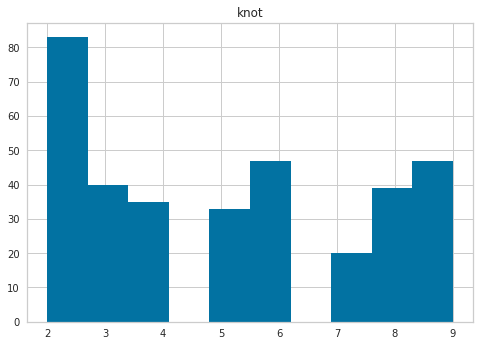

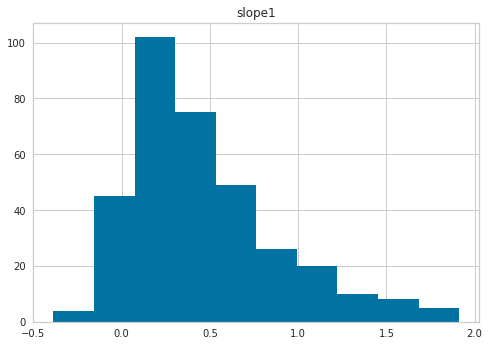

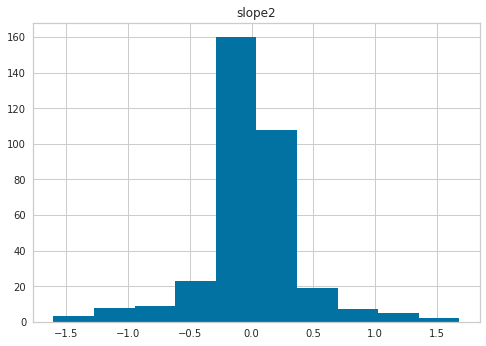

In [ ]:
import regressor as reg
import cluster as clu
import intervention_data_preprocessing as idp
import individual_differences_plot as plot
int_test = idp.InterventionProcessor(data_no_missing)
int_test.basic_analyze()
piece_lin_reg = reg.PiecewiselinRegressor(['knot', 'slope1', 'slope2'])
int_test.register_regressor(piece_lin_reg)
int_test.fit()
int_test.mark_outlier(['r2','slope1','slope2'])
int_test.delete_outlier()
plot.plot_distribution(int_test.data, ['knot','slope1','slope2'])

The silhouette score of GaussianMixture(n_components=3, random_state=0) is: 0.340
Sample of each cluster: label
0    121
1     83
2    140
dtype: int64
The mean of each mixture component: [[-0.27710909  0.1699385 ]
 [-1.2269439   0.78622193]
 [ 1.03570742 -0.65628867]]
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif


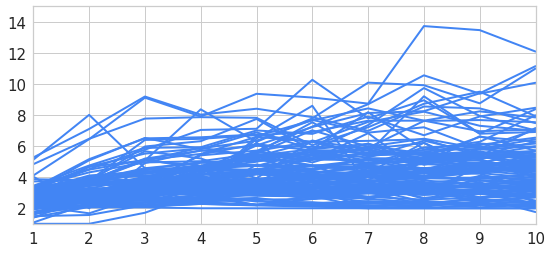

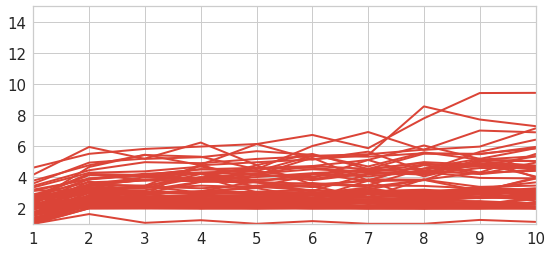

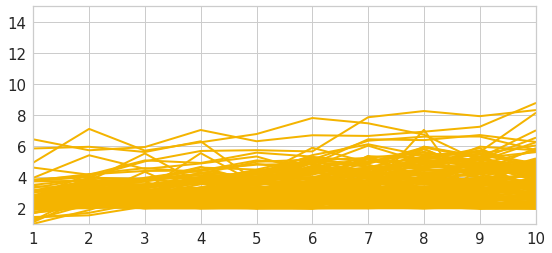

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif


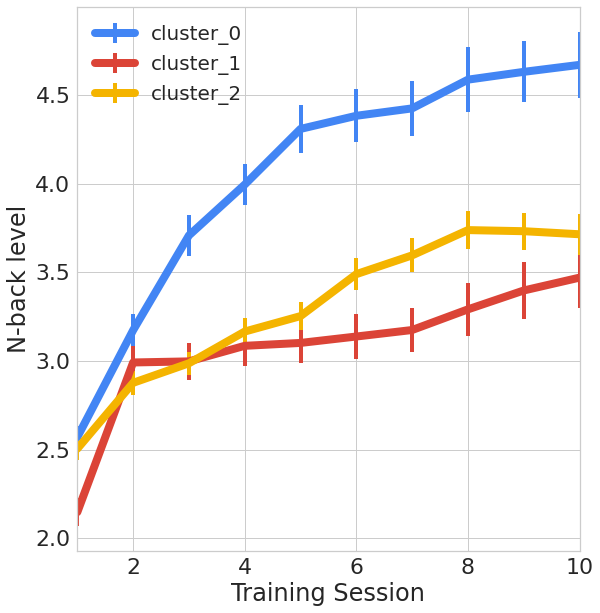

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif


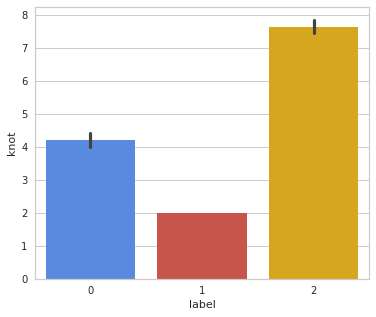

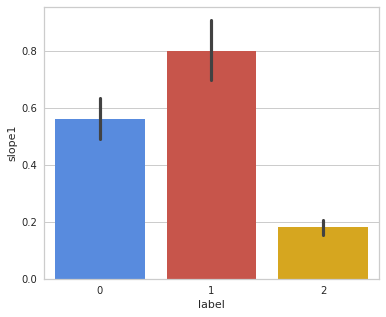

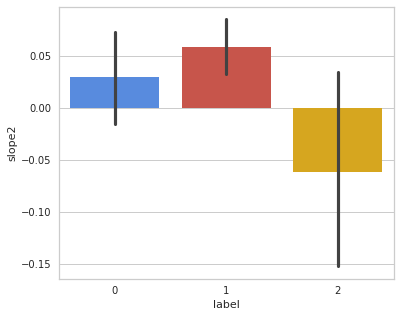

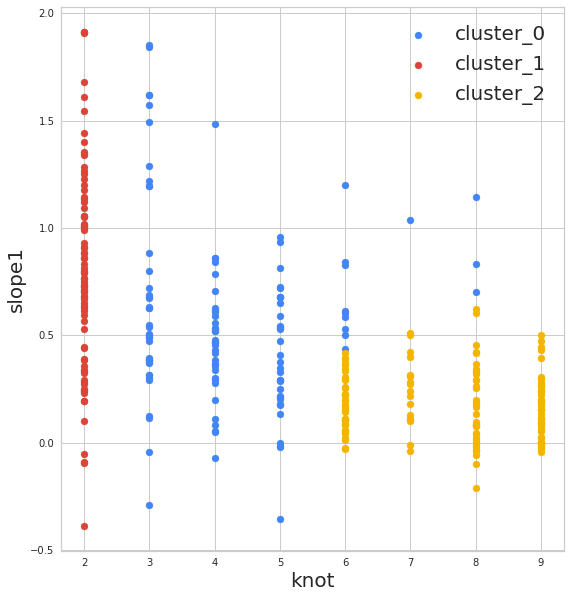

In [ ]:
# clustering
kmeans_3com = clu.Kmeans(3, ['knot', 'slope1'])
em_3com = clu.EM(3, ['knot','slope1'])
int_test.register_cluster_model(em_3com)
int_test.cluster()
# plot
plot.plot_cluster_result(int_test.data, int_test.intervention_col_names)
plot.bar_plot_cluster(int_test.data, ['knot','slope1','slope2'])
plot.plot_scatter_cluster(int_test.data, ['knot','slope1'])

In [ ]:
import feature_preprocessor as fp
fp_test = fp.FeatureProcessor(data_no_missing)
fp_test.corr_features()
# fp_test.distri_features()
fp_test.discretize_features()

These two features correlated above 0.5:Grit_Ambition, Person_conscien
These two features correlated above 0.5:Person_conscien, Grit_Ambition


In [ ]:
import classification_preprocessor as cp
cp_test = cp.ClassifyPreprocessor(int_test.data, fp_test.data)
# cp_test.delete_outlier()
cp_test.feature_test()
cp_test.feature_selection(8)
# cp_test.use_categorical_features()

The F test result for SES: f:0.797, p:0.452
The F test result for VGQ: f:4.666, p:0.010
The F test result for CFQ: f:0.032, p:0.969
The F test result for Grit_Ambition: f:1.351, p:0.260
The F test result for MRpre: f:3.957, p:0.020
The F test result for DM_diff_pre: f:2.007, p:0.136
The F test result for WM_pre: f:6.504, p:0.002
The F test result for Updating_pre: f:0.721, p:0.487
The F test result for Person_extraver: f:1.057, p:0.349
The F test result for Person_agreeable: f:0.219, p:0.803
The F test result for Person_conscien: f:0.447, p:0.640
The F test result for Person_emot: f:0.335, p:0.715
The F test result for Person_opennes: f:2.046, p:0.131
(344, 13)
WM_pre 6.503996655792581
VGQ 4.666336368813593
MRpre 3.956974588471946
Person_opennes 2.0458949865839196
DM_diff_pre 2.0070169489328946
Grit_Ambition 1.3507704967100982
Person_extraver 1.0568252453513127
SES 0.7969834609804411
Updating_pre 0.720696720256444
Person_conscien 0.44733716879469165
Person_emot 0.3351411164054491
Perso

In [ ]:
X, Y = cp_test.resample_standardize({0:121, 1:113, 2:140})
print('The input and output shape: {} and {}'.format(X.shape, Y.shape))

(344, 8)
The sample weight before resample: Counter({2: 140, 0: 121, 1: 83})
The sample weight after resample: Counter({2: 140, 0: 121, 1: 113})
The input and output shape: (374, 8) and (374,)


Logitic Reg Accuracy: 0.411 (0.049)
f1 score: 0.413
precision: 0.415
recall: 0.413
Logitic Reg: [[40 30 51]
 [22 31 30]
 [44 26 70]]


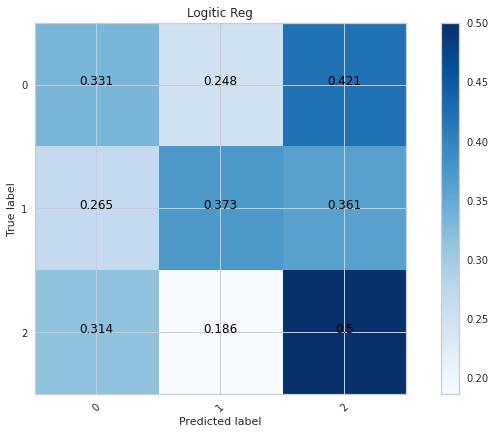

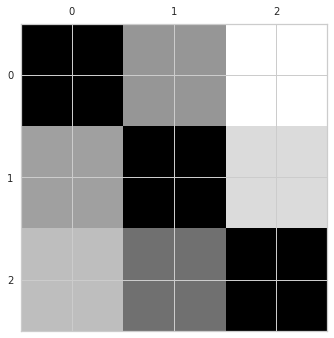

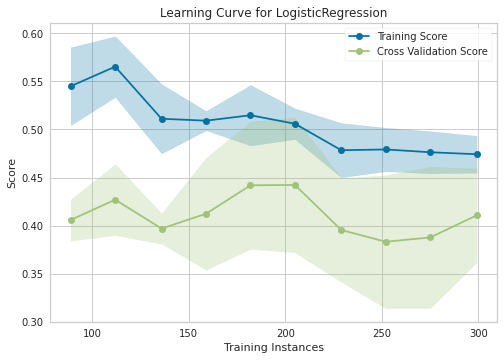

Nearest Neighbors Accuracy: 0.476 (0.057)
f1 score: 0.477
precision: 0.476
recall: 0.480
Nearest Neighbors: [[46 30 45]
 [22 40 21]
 [42 29 69]]


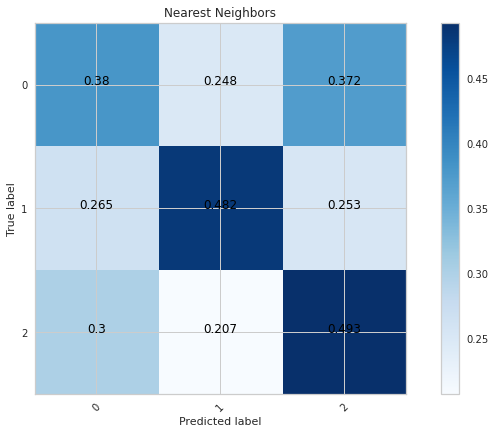

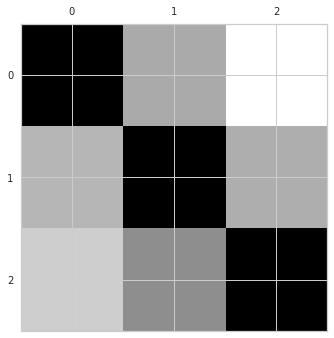

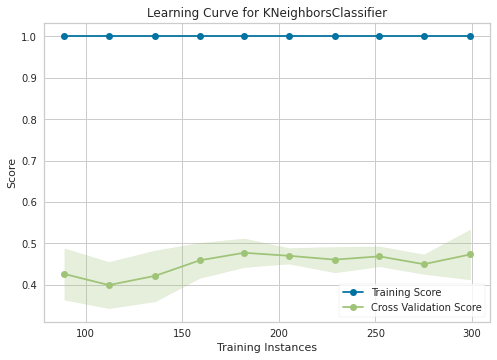

Random Forest Accuracy: 0.430 (0.032)
f1 score: 0.437
precision: 0.460
recall: 0.438
Random Forest: [[46 13 62]
 [19 24 40]
 [31 24 85]]


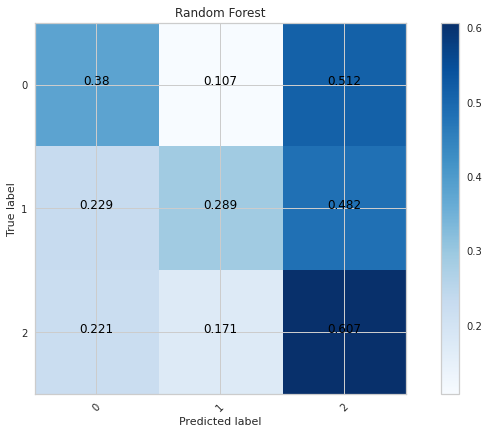

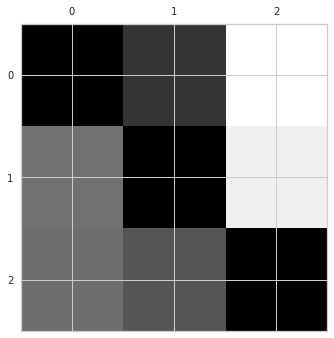

In [ ]:
import classification as clf
classify_test = clf.ClassificationProcessor(X,Y)
classify_test.model_selection()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=6b8ead81-70bf-4d6b-bd50-8194f8f72b46' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>